In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results/N100-F1000-S100-R100-result-v7.csv')
df.describe()

,correlation,load,value,disturbance,actual_load
count,31500.00000,31500.000000,27526.000000,31500.000000,3.150000e+04
mean,0.50000,0.800000,16.970240,0.140910,1.207002e+06
std,0.30277,0.070712,18.339784,0.038047,5.996611e+04
min,0.00000,0.700000,3.267663,0.009280,9.750961e+05
25%,0.25000,0.750000,8.743309,0.122919,1.173361e+06
50%,0.50000,0.800000,11.214258,0.149368,1.204524e+06
75%,0.75000,0.850000,14.132440,0.170601,1.240653e+06
max,1.00000,0.900000,91.976426,0.202864,1.510382e+06


In [3]:
vals = df.drop(['disturbance', 'actual_load'], axis=1).groupby(['algorithm', 'correlation', 'load']).mean()
vals = vals.unstack(0)
vals.reset_index(inplace=True)
vals.head()

correlation  load      value                      
algorithm                           BF         RR       SALP
0                 0.0  0.70   4.244327   4.447232   3.615472
1                 0.0  0.75   6.011890   6.280456   5.382232
2                 0.0  0.80   8.321163  11.926592   7.878604
3                 0.0  0.85  11.179141  38.346250  11.003859
4                 0.0  0.90  14.817580        NaN  52.974689

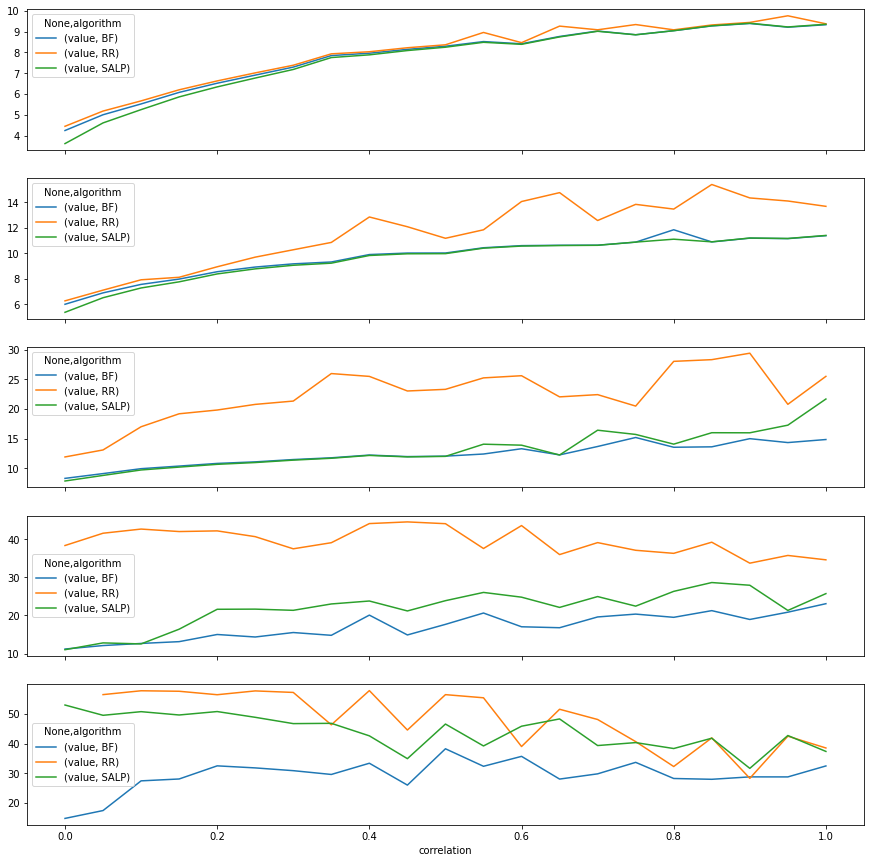

In [4]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

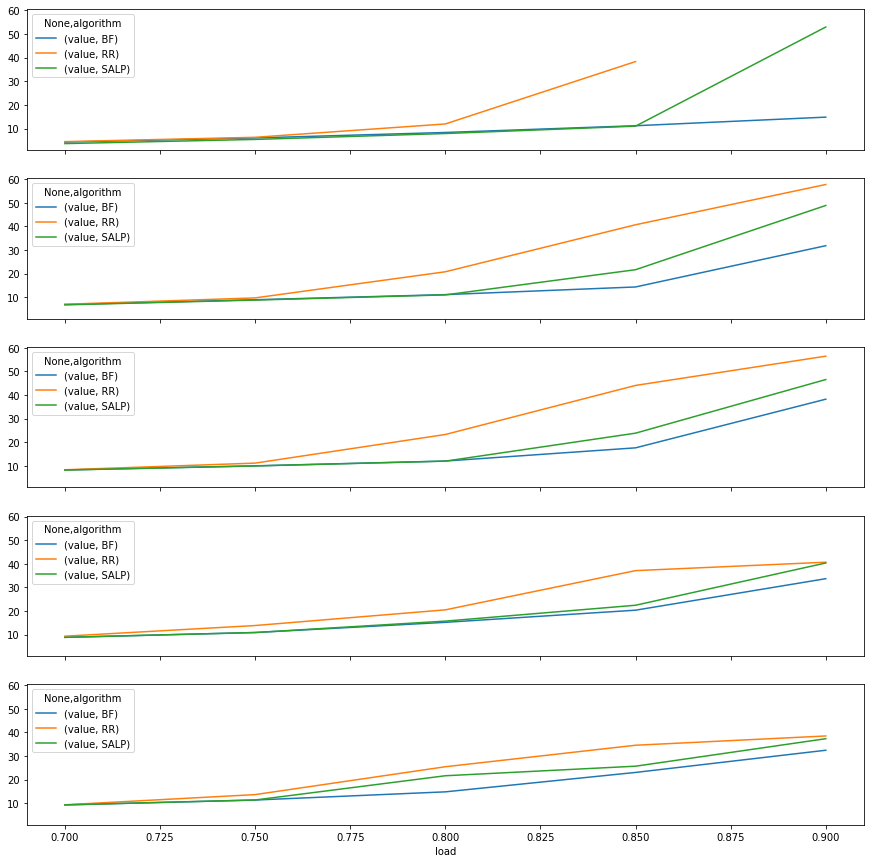

In [5]:
cors = np.array([0,.25,.5,.75,1])
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True, sharey=True)
for i in range(cors.size):
    vals[vals['correlation']==cors[i]].drop('correlation', axis=1).plot(x='load', ax=axes[i], legend=True)
plt.show()

In [6]:
df.groupby(['algorithm', 'load']).count()

correlation  value  disturbance  actual_load
algorithm load                                              
BF        0.70         2100   2100         2100         2100
          0.75         2100   2100         2100         2100
          0.80         2100   2099         2100         2100
          0.85         2100   2078         2100         2100
          0.90         2100   1879         2100         2100
RR        0.70         2100   2100         2100         2100
          0.75         2100   2074         2100         2100
          0.80         2100   1871         2100         2100
          0.85         2100   1105         2100         2100
          0.90         2100    284         2100         2100
SALP      0.70         2100   2100         2100         2100
          0.75         2100   2099         2100         2100
          0.80         2100   2092         2100         2100
          0.85         2100   1994         2100         2100
          0.90         2100   1551         2100         2100

In [7]:
dist = df.drop(['value', 'actual_load'], axis=1).groupby(['algorithm', 'correlation', 'load']).mean()
dist = dist.unstack(0)
dist.reset_index(inplace=True)
dist.head()

correlation  load disturbance                    
algorithm                            BF        RR      SALP
0                 0.0  0.70    0.178563  0.186044  0.156411
1                 0.0  0.75    0.178824  0.186050  0.156178
2                 0.0  0.80    0.178646  0.185735  0.156340
3                 0.0  0.85    0.178900  0.185971  0.156498
4                 0.0  0.90    0.178859  0.185728  0.156486

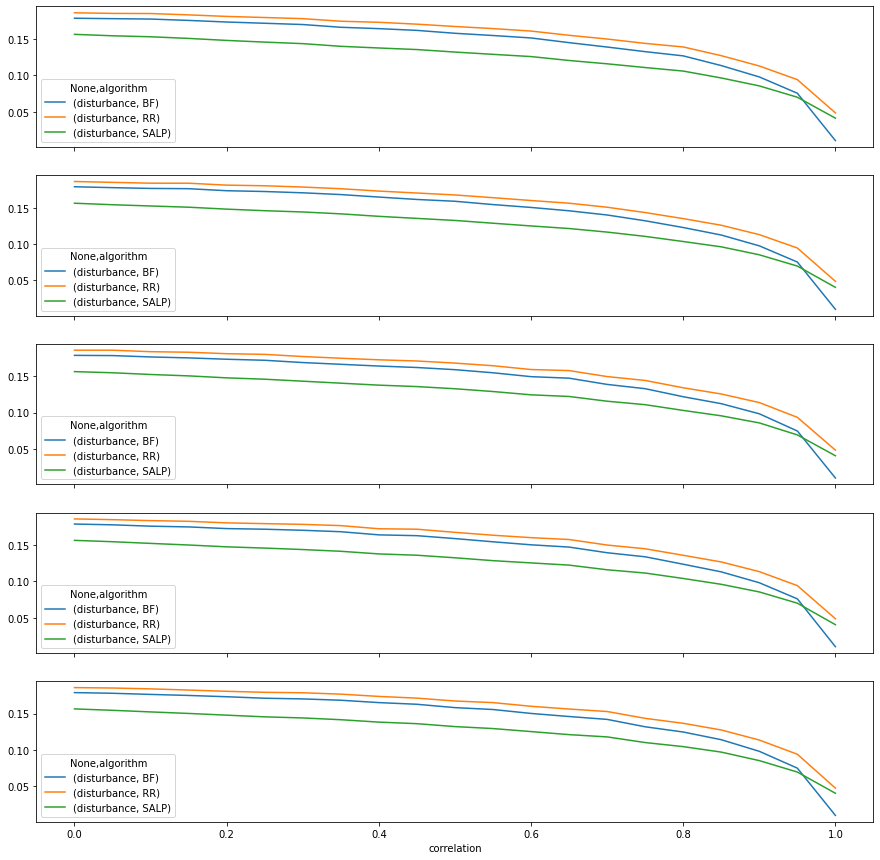

In [8]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    dist[dist['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

In [9]:
acld = df.drop(['algorithm', 'value', 'disturbance'], axis=1).groupby(['correlation', 'load']).mean()
# acld = acld.unstack(0)
acld.reset_index(inplace=True)
acld.head()

,correlation,load,actual_load
0,0.0,0.70,1.199534e+06
1,0.0,0.75,1.200298e+06
2,0.0,0.80,1.200735e+06
3,0.0,0.85,1.199224e+06
4,0.0,0.90,1.200921e+06


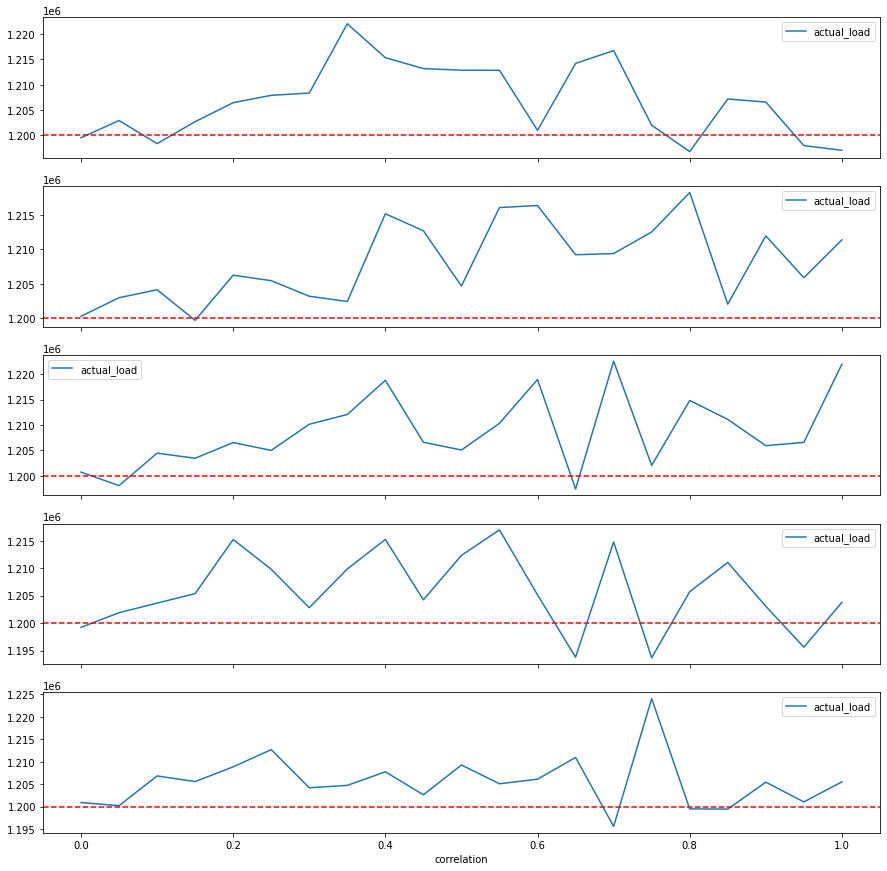

In [10]:
est = 1.2 * 10**6
loads = acld['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
    axes[i].axhline(est,color='red',ls='--')
plt.show()

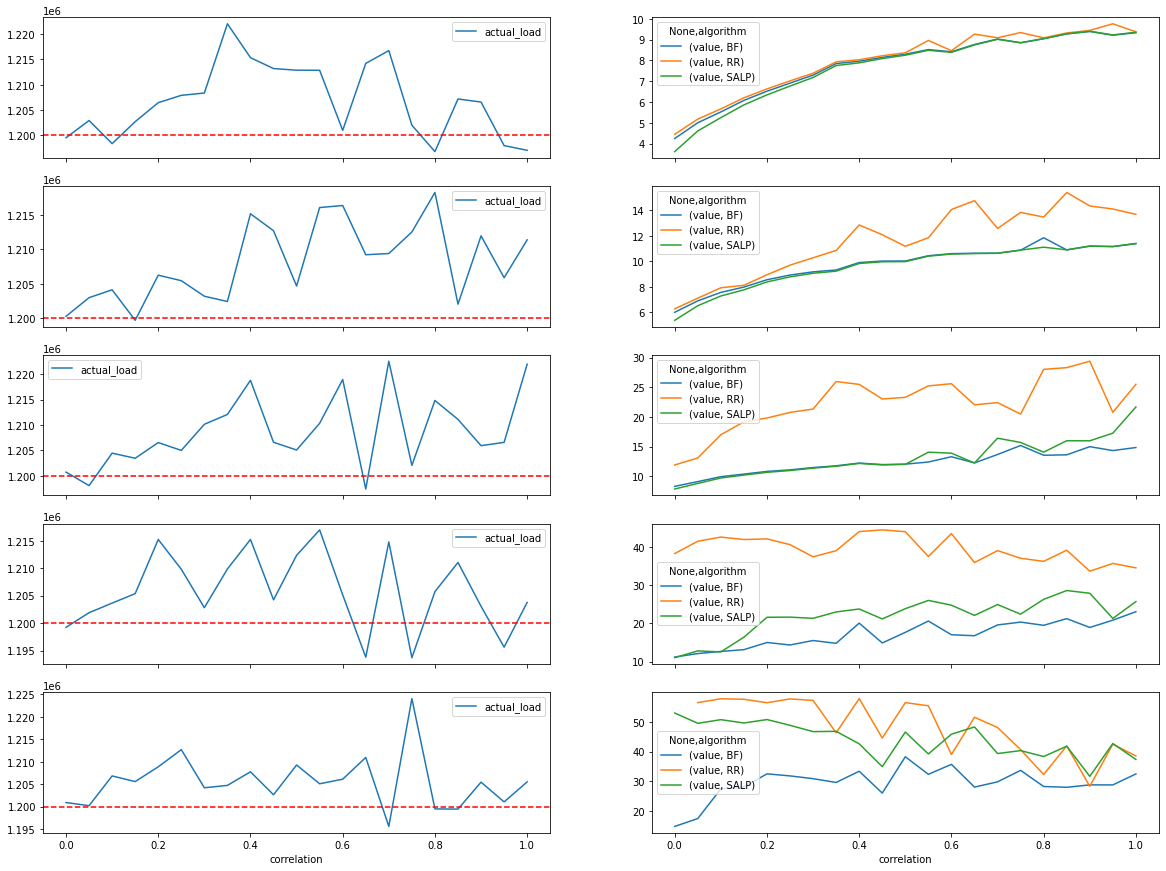

In [11]:
loads = acld['load'].unique()
fig, axes = plt.subplots(loads.size, 2, figsize=(20,15), sharex=True)
for i in range(loads.size):
    acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][0], legend=True)
    axes[i][0].axhline(est,color='red',ls='--', label="estimated")
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][1], legend=True)

plt.show()